In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
import tensorflow as tf

In [19]:
# importing the dataset

df1 = pd.read_csv("california_housing_train.csv")

In [20]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [21]:
# scale the label

df1['median_house_value'] /= 1000.0

df1.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [22]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [23]:
# Defining a function that builts a  model

def built_model(learning_rate):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model


In [24]:
# Trining a model

def train_model(model,df,feature,label,epochs,batch_size):
    
    history = model.fit(x=df[feature],y=df[label],batch_size=batch_size,epochs=epochs)
    
    weight = model.get_weights()[0]
    bias = model.get_weights()[1]
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    
    rmse = hist["root_mean_squared_error"]
    
    return weight,bias,epochs,rmse

print("defined the build_model and train_model fun")

defined the build_model and train_model fun


In [28]:
def plotting_model(weight,bias,feature,label):
    
    plt.xlabel(feature)
    plt.ylabel(label)
    
    random_example = df1.sample(n=200)
    plt.scatter(random_example[feature],random_example[label])
    
    x0 = 0
    y0 = bias
    x1 = random_example[feature].max()
    y1 = bias + (weight * x1)
    plt.plot([x0,x1],[y0,y1],c="r")
    
    plt.show()
    
    
    

In [29]:
# loss curve

def plotting_loss_curve(epochs,rmse):
    
    plt.figure()
    plt.xlabel("epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs,rmse,label = "Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97 , rmse.max()])
    plt.show()
    
    
print("Defined plotting_model and plotting_loss_curve fun")
    
    

Defined plotting_model and plotting_loss_curve fun


Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 6736540.5000 - root_mean_squared_error: 2595.4846
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 1006295.3125 - root_mean_squared_error: 1003.1427
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27578.7383 - root_mean_squared_error: 166.0685
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 27497.1406 - root_mean_squared_error: 165.8226
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 27475.9336 - root_mean_squared_error: 165.7587
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 27374.3672 - root_mean_squared_error: 165.4520
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 27251.8105 - root_mean_squared_error: 165.0812
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 27212.6621 - root_mean_squared_error: 164.9626
Epoch 9/30
567/567 [======

C:\Users\abc\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


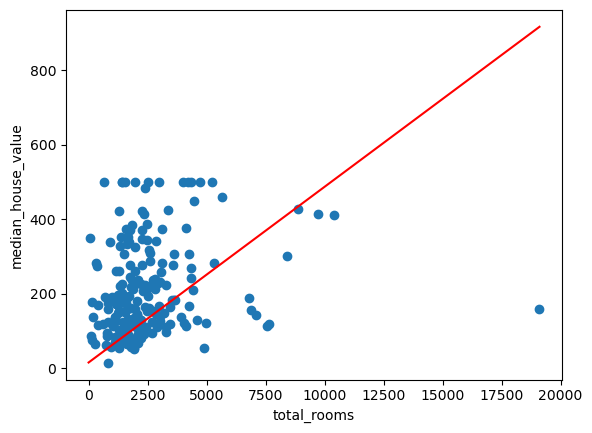

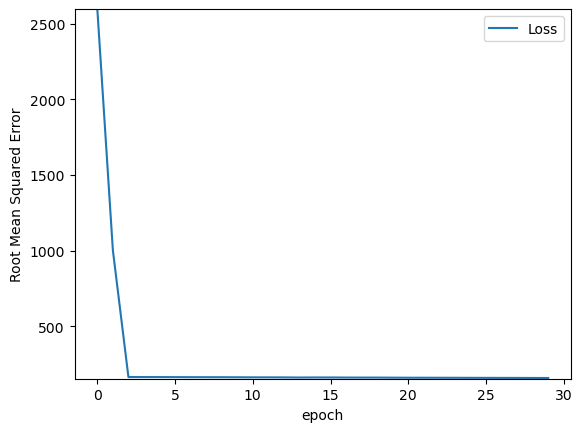

In [30]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = "total_rooms"
my_label = "median_house_value"

my_model = None

my_model = built_model(learning_rate)
weight1,bias1,epochs,rmse = train_model(my_model,df1,my_feature,my_label,epochs,batch_size)

print("The learned weight of the model is %.4f"% weight1)
print("The learned bias of the model is %.4f" % bias1)

plotting_model(weight1,bias1,my_feature,my_label)
plotting_loss_curve(epochs,rmse)


In [37]:
# Defining house prediction function

def predict(n,feature,label):
    
    batch = df1[feature][10000 : 10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)
    
    print("Feature      label          Predicted")
    print("Value        Value          Value")
    print("             in thousands   in thousands")
    print("-------------------------------------------")
    
    for i in range(n):
        print("%5.0f %11.0f %15.0f" % (df1[feature][10000 +i],
                                     df1[label][10000 +i],
                                     predicted_values[i][0]))

In [38]:
predict(10,my_feature,my_label)

Feature      label          Predicted
Value        Value          Value
             in thousands   in thousands
-------------------------------------------
 1960          53             108
 3400          92             176
 3677          69             189
 2202          62             120
 2403          80             129
 5652         295             282
 3318         500             172
 2552         342             136
 1364         118              80
 3468         128             179


Epoch 1/18
5667/5667 [==============================] - 12s 2ms/step - loss: 36402.7500 - root_mean_squared_error: 190.7950
Epoch 2/18
5667/5667 [==============================] - 12s 2ms/step - loss: 30992.7129 - root_mean_squared_error: 176.0475
Epoch 3/18
5667/5667 [==============================] - 10s 2ms/step - loss: 30419.2363 - root_mean_squared_error: 174.4111
Epoch 4/18
5667/5667 [==============================] - 10s 2ms/step - loss: 30070.3926 - root_mean_squared_error: 173.4082
Epoch 5/18
5667/5667 [==============================] - 10s 2ms/step - loss: 29488.8594 - root_mean_squared_error: 171.7232
Epoch 6/18
5667/5667 [==============================] - 10s 2ms/step - loss: 29259.8965 - root_mean_squared_error: 171.0552
Epoch 7/18
5667/5667 [==============================] - 10s 2ms/step - loss: 28562.3906 - root_mean_squared_error: 169.0041
Epoch 8/18
5667/5667 [==============================] - 10s 2ms/step - loss: 28109.9707 - root_mean_squared_error: 167.6603
Epoch 9/

C:\Users\abc\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


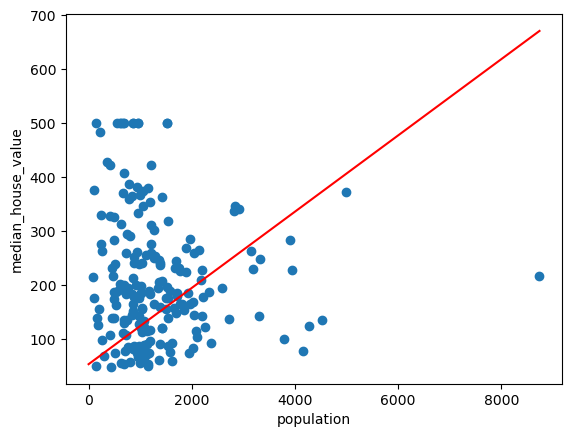

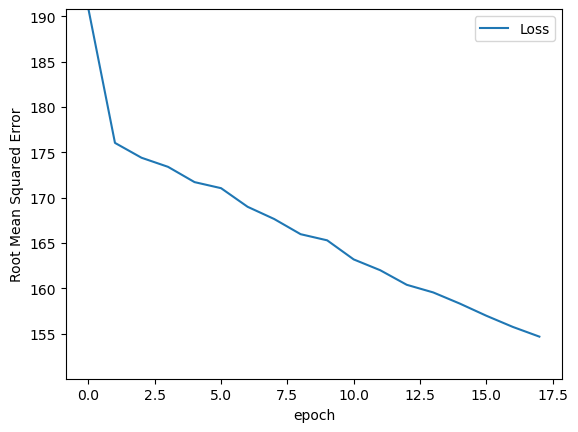

Feature      label          Predicted
Value        Value          Value
             in thousands   in thousands
-------------------------------------------
 1286          53             144
 1867          92             185
 2191          69             208
 1052          62             127
 1647          80             169
 2312         295             216
 1604         500             166
 1066         342             128
  338         118              76
 1604         128             166


In [39]:
my_feature = "population"

learning_rate = 0.05
epochs = 18
batch_size=3

my_model = built_model(learning_rate)
weight1,bias1,epochs,rmse = train_model(my_model,df1,my_feature,my_label,epochs,batch_size)

plotting_model(weight1,bias1,my_feature,my_label)
plotting_loss_curve(epochs,rmse)

predict(10,my_feature,my_label)

Epoch 1/24
567/567 [==============================] - 2s 2ms/step - loss: 57156.1133 - root_mean_squared_error: 239.0734
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 56429.9141 - root_mean_squared_error: 237.5498
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 55705.9492 - root_mean_squared_error: 236.0211
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 54995.9531 - root_mean_squared_error: 234.5122
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 54288.5117 - root_mean_squared_error: 232.9989
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 53583.8867 - root_mean_squared_error: 231.4819
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 52888.2461 - root_mean_squared_error: 229.9744
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 52200.1289 - root_mean_squared_error: 228.4735
Epoch 9/24
567/567 [============

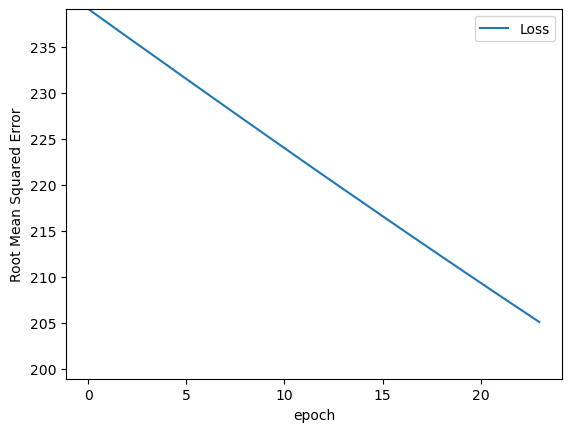

Feature      label          Predicted
Value        Value          Value
             in thousands   in thousands
-------------------------------------------
    2          53              32
    2          92              36
    2          69              34
    2          62              39
    1          80              31
    2         295              43
    2         500              39
    2         342              43
    4         118              63
    2         128              40
    2         187              43
    3          80              46
    2         112              43
    2          95              41
    2          69              39


In [41]:
df1["rooms_per_person"] = df1["total_rooms"]/df1["population"]
my_feature = "rooms_per_person"

learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = built_model(learning_rate)
weight1,bias1,epochs,mae = train_model(my_model,df1,my_feature,my_label,epochs,batch_size)

plotting_loss_curve(epochs,mae)
predict(15,my_feature,my_label)

In [42]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


Epoch 1/18
5667/5667 [==============================] - 11s 2ms/step - loss: 50527.9062 - root_mean_squared_error: 224.7841
Epoch 2/18
5667/5667 [==============================] - 11s 2ms/step - loss: 40415.7773 - root_mean_squared_error: 201.0368
Epoch 3/18
5667/5667 [==============================] - 11s 2ms/step - loss: 31769.3887 - root_mean_squared_error: 178.2397
Epoch 4/18
5667/5667 [==============================] - 11s 2ms/step - loss: 24510.0781 - root_mean_squared_error: 156.5569
Epoch 5/18
5667/5667 [==============================] - 11s 2ms/step - loss: 18618.3125 - root_mean_squared_error: 136.4489
Epoch 6/18
5667/5667 [==============================] - 11s 2ms/step - loss: 14056.7881 - root_mean_squared_error: 118.5613
Epoch 7/18
5667/5667 [==============================] - 11s 2ms/step - loss: 10817.7402 - root_mean_squared_error: 104.0084
Epoch 8/18
5667/5667 [==============================] - 10s 2ms/step - loss: 8801.4072 - root_mean_squared_error: 93.8158
Epoch 9/18

C:\Users\abc\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


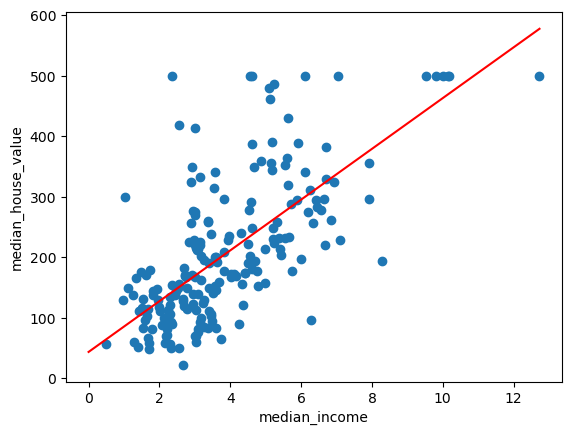

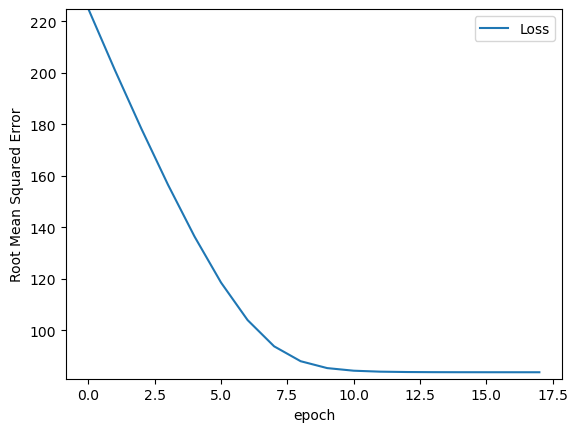

Feature      label          Predicted
Value        Value          Value
             in thousands   in thousands
-------------------------------------------
    2          53             134
    4          92             211
    3          69             154
    2          62             132
    3          80             153
    2         295             147
   10         500             454
    5         342             259
    2         118             146
    4         128             220


In [43]:
my_feature = "median_income"

learning_rate = 0.05
epochs = 18
batch_size=3

my_model = built_model(learning_rate)
weight1,bias1,epochs,rmse = train_model(my_model,df1,my_feature,my_label,epochs,batch_size)

plotting_model(weight1,bias1,my_feature,my_label)
plotting_loss_curve(epochs,rmse)

predict(10,my_feature,my_label)